In [34]:
# 0 - RL - Teoría.ipynb
%load_ext autoreload
%autoreload 2
# tambien lo cargue aca
# https://colab.research.google.com/drive/1d3JDe-7Hra1a-1O_SWlFqBU7vpWh21oU#scrollTo=BjDemy9PzxTl
# pero no lo pude ejecutar en ninguna de las plataformas.
# original: https://colab.research.google.com/github/lab-ml-itba/Regresion-Logistica/blob/master/0%20-%20RL%20-%20Teor%C3%ADa.ipynb#scrollTo=-HgFcvPnzxT-

#import os
#os.environ["DISPLAY"]="localhost:10.0"
%reload_ext autoreload
%autoreload 2
#%matplotlib qt
import pandas as pd
import helper
from matplotlib import pyplot as plt
df = pd.read_csv('data/alturas-pesos-mils-train.csv')
df["Genero"]=(df["Genero"]!="Hombre").astype(int)
df.head() #Para visualizar las primeras 5 observaciones

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Unnamed: 0,Genero,Peso,Altura
0,7620,1,61.235,162.402
1,1837,0,97.432,181.908
2,3311,0,73.324,172.459
3,9478,1,55.193,157.748
4,7805,1,56.886,151.798


In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
X=df[['Peso','Altura']].values
y=df['Genero'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
clf = SGDClassifier(loss='log',penalty=None,max_iter=10)
clf.fit(X_train, y_train)
print(clf.predict(X_train[:2, :]))
print(y_train[:2])
print(clf.predict_proba(X_train[:2, :]))
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
clf.coef_

[1 1]
[1 1]
[[0. 1.]
 [0. 1.]]
0.8966417910447761
0.8928030303030303


/home/j3nnn1/anaconda3/envs/mlp_machinelearning/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[-7110.86640931,  3177.69469991]])

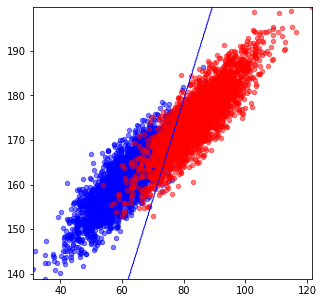

In [36]:
#%matplotlib inline
helper.plotBoundary(X_train, y_train,  clf, 100)

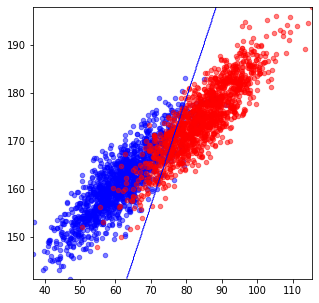

In [37]:
helper.plotBoundary(X_test, y_test,  clf, 50)

In [38]:
#grafica de la funcion de costo.
L=500
import numpy as np
w1=np.linspace(-0.1,0.5,30)
w2=np.linspace(-0.3,0.05,30)
w1,w2=np.meshgrid(w1,w2)
W=np.vstack([w1.flatten(),w2.flatten()])
aux1=1/(1+np.exp(-np.dot(X[0:L],W)))
aux2=1/(1+np.exp(np.dot(X[0:L],W)))
y_aux=np.repeat(y[0:L],aux1.shape[1]).reshape(aux1.shape)
loss=(y_aux*aux1+(1-y_aux)*aux2)/X.shape[0]
loss=loss.sum(axis=0).reshape(w1.shape)


In [39]:
loss.shape

(30, 30)

/tmp/ipykernel_71661/115606760.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


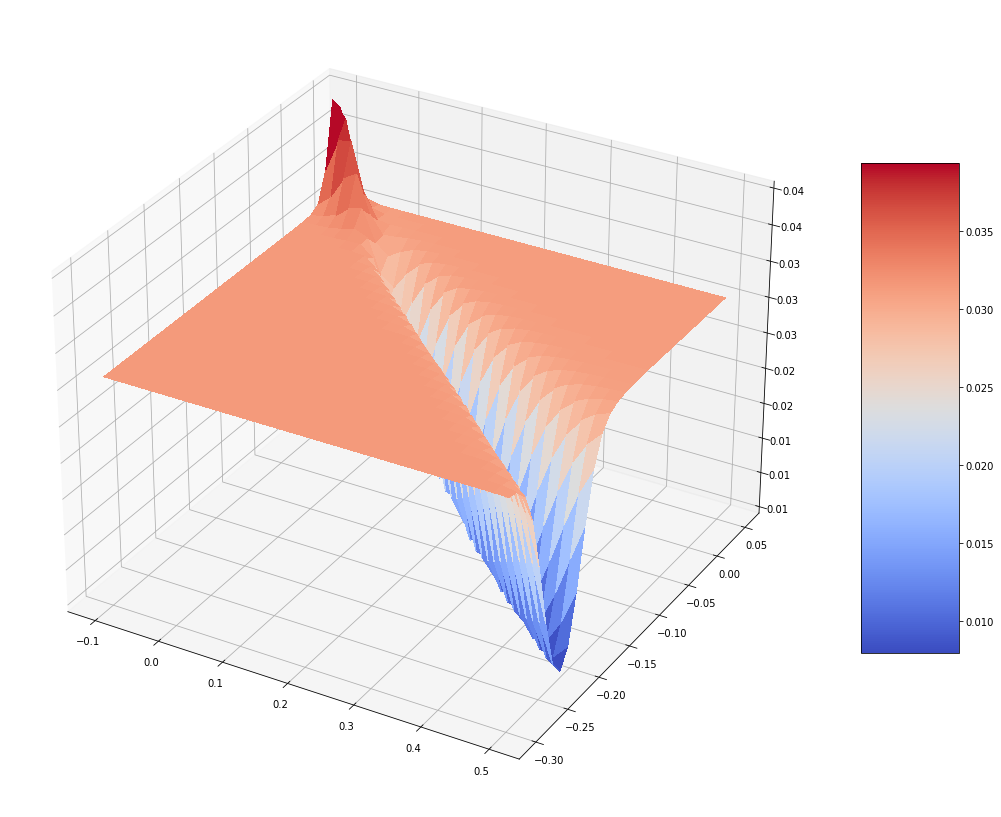

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=[18,18])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(w1, w2, loss, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [41]:
w1.shape

(30, 30)

In [42]:
# Regresión logística en Keras
# Regresión logística en Keras
import numpy as np
from tensorflow.keras.models import Sequential #Para poder definir un modelo secuencial
from tensorflow.keras.layers import Dense, BatchNormalization #Para poder usar capas densas
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.animation as animation

In [43]:
def show_learning(optimizer='Adam', batch_size=32,epochs=10,filename='movie.mp4'):
    model=Sequential() #Queda definido el modelo sequencial
    #model.add(BatchNormalization())
    model.add(Dense(1, input_shape=(2,),activation='sigmoid',use_bias=False,kernel_initializer='zeros',bias_initializer='zeros'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    learning_curve=helper.plot_learning_curve(plot_interval=1,
                                              evaluate_interval=None,
                                              x_val=None,
                                              y_val_categorical=None,
                                              epochs=epochs)
    def get_weights(model):
        w1=model.layers[0].get_weights()[0][0][0]
        w2=model.layers[0].get_weights()[0][1][0]
        return [w1,w2]
    def set_weights(model, w1, w2):
        weights=model.layers[0].get_weights()
        weights[0][0][0]=w1
        weights[0][1][0]=w2
        model.layers[0].set_weights(weights)
    log_weights=helper.log_weights(get_weights)
    set_weights(model=model,w1=0.1,w2=-0.14)
    X_loss=X_train[0:100,:]
    y_loss=y_train[0:100]
    %matplotlib inline
    # history=model.fit(X_train, y_train, validation_data=[X_test,y_test],
    #               epochs=epochs,verbose=0, batch_size=batch_size,shuffle = True,
    #               callbacks=[learning_curve, log_weights])
    history=model.fit(X_train, y_train, validation_data=(X_test,y_test),
                  epochs=epochs,verbose=0, batch_size=batch_size,shuffle = True,
                  callbacks=[learning_curve, log_weights])
    loss=list()
    % matplotlib qt
    w1_mesh,w2_mesh,J=helper.plot_loss_surface(X_loss, y_loss, model, set_weights, [-1,0.5], [-0.2,0.5],20,plot=True)
    for w in log_weights.weights:
        loss.append(helper.get_loss(w[0],w[1],model,X=X_loss,y=y_loss,set_weights=set_weights))
    data = np.hstack([np.array(log_weights.weights),np.array(loss).T.reshape(-1,1)]).T
    fig, ax = plt.subplots()
    CS = ax.contourf(w1_mesh, w2_mesh, J, 100, cmap=plt.cm.coolwarm)
    line, = ax.plot([], [],'k')
    def animate(i):
        line.set_data(data[0,:i],data[1,:i])  # update the data
        if i % int(len(loss)/100)==0:
            porc=int(i/len(loss)*100)
            print("\r {}%".format(porc),end="")
        return line,
    ani = animation.FuncAnimation(fig, animate, len(loss),
                              interval=25, blit=False)
    ani.save(filename)
    plt.show()


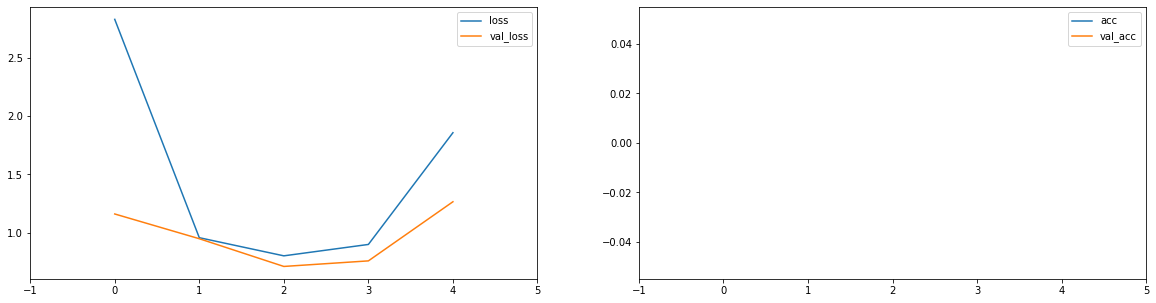

UsageError: Line magic function `%` not found.


In [44]:
lr=1e-4
momentum=0.99
#nesterov=0.99  # espera un boolean la funcion SGD.?? problemas de versiones de tensorflow. y la API keras
nesterov=False # espera un boolean la funcion SGD.??
decay=0
batch_size=32
epochs=5
optimizer=SGD(lr=lr,momentum=momentum, nesterov=nesterov,decay=decay)
show_learning(optimizer=optimizer,
              batch_size=batch_size,
              epochs=epochs,
              filename='sgd-{}-{}-{}-{}-{}-{}.mp4'.format(lr,momentum,nesterov,decay,batch_size,epochs))

In [ ]:
# %matplotlib inline
# fig1, ax2 = plt.subplots(constrained_layout=True)
# CS = ax2.contourf(w1_mesh, w2_mesh, J, 100, cmap=plt.cm.coolwarm)
# ax2.plot(np.array(log_weights.weights).T[0],np.array(log_weights.weights).T[1],'k')
# plt.show()